In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [71]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/spam.csv'
data = pd.read_csv(file_url)

In [72]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [73]:
data['target'].unique()

array(['ham', 'spam'], dtype=object)

In [44]:
sample_string = data['text'].loc[0]
sample_string

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [56]:
def remove_punc(x):
    new_string=[]
    for i in x:
        if i not in string.punctuation:
            new_string.append(i)
    new_string = ''.join(new_string)
    return new_string

In [74]:
data['text']=data['text'].map(remove_punc)

In [63]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bluea\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [70]:
def stop_words(x):
    new_string=[]
    for i in x.split():
        if i.lower() not in stopwords.words('english'):
            new_string.append(i.lower())
    new_string=' '.join(new_string)
    return new_string

data['text'] =data['text'].apply(stop_words)

In [75]:
data['target'] = data['target'].map({'spam':1,'ham':0})
data['target']

0       0
1       0
2       1
3       0
4       0
       ..
5569    1
5570    0
5571    0
5572    0
5573    0
Name: target, Length: 5574, dtype: int64

In [76]:
x=data['text']
y=data['target']

In [77]:
cv=CountVectorizer()
cv.fit(x)
cv.vocabulary_

{'go': 3822,
 'until': 8779,
 'jurong': 4734,
 'point': 6501,
 'crazy': 2518,
 'available': 1427,
 'only': 6094,
 'in': 4444,
 'bugis': 1901,
 'great': 3919,
 'world': 9288,
 'la': 4895,
 'buffet': 1899,
 'cine': 2235,
 'there': 8352,
 'got': 3879,
 'amore': 1188,
 'wat': 9040,
 'ok': 6054,
 'lar': 4934,
 'joking': 4702,
 'wif': 9180,
 'oni': 6088,
 'free': 3606,
 'entry': 3188,
 'wkly': 9239,
 'comp': 2351,
 'to': 8477,
 'win': 9195,
 'fa': 3324,
 'cup': 2574,
 'final': 3450,
 'tkts': 8466,
 '21st': 454,
 'may': 5384,
 '2005': 441,
 'text': 8291,
 '87121': 875,
 'receive': 6901,
 'questionstd': 6792,
 'txt': 8680,
 'ratetcs': 6844,
 'apply': 1277,
 '08452810075over18s': 71,
 'dun': 3037,
 'say': 7261,
 'so': 7682,
 'early': 3059,
 'hor': 4263,
 'already': 1160,
 'then': 8346,
 'nah': 5736,
 'dont': 2943,
 'think': 8374,
 'he': 4077,
 'goes': 3836,
 'usf': 8832,
 'lives': 5098,
 'around': 1329,
 'here': 4137,
 'though': 8395,
 'freemsg': 3614,
 'hey': 4156,
 'darling': 2638,
 'its': 46

In [87]:
x=cv.transform(x)

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

In [93]:
model = MultinomialNB()
model.fit(x_train, y_train)
prd =model.predict(x_test)

In [95]:
accuracy_score(y_test, prd)

0.9802690582959641

<Axes: >

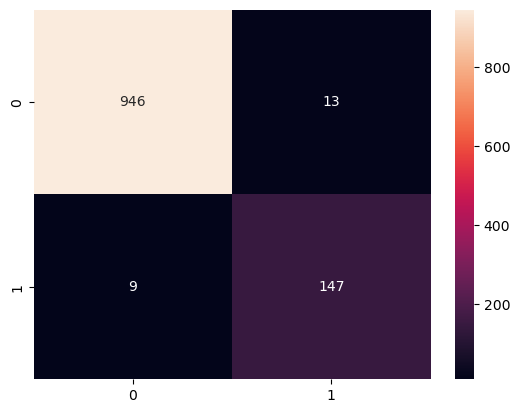

In [96]:
sns.heatmap(confusion_matrix(y_test, prd), annot=True, fmt ='.0f')